In [ ]:
import pandas as pd

titanic = pd.read_csv(r'3rd_data\train.csv')
titanic.head()

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
## 'PassengerId' : 승객번호, 'Survived' : 생존여부(0-사망, 1-생존)
## 'Pclass' : 객실등급(1,2,3), 'Name' : 승객이름, 'Sex' : 성별, 'Age' : 나이, 'SibSp' : 함께 탑승한 형제와 배우자 수
## 'Parch' : 함께 탑승한 부모, 아이수, 'Ticket' : 티켓번호, 'Fare' : 요금, 'Cabin' : 객실번호, 'Embarked : 탑승항구('S','C','Q')'

# 결측치

### 결측치 데이터 : 삭제, 다른값 대체

In [13]:
#결측치 확인하기

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# 결측데이터가 너무 많으면 데이터 분석에 의미가 없기 때문에 삭제한다.
# 결측 데이터 삭제, Cabin 삭제

titanic.drop('Cabin', axis=1, inplace=True)

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [17]:
# 결측 데이터 최빈값으로 대체하기

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
titanic['Embarked'].fillna('S', inplace=True)

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [23]:
# 결측데이터 평균값으로 대체
# 나이 열

titanic['Age'].mean()

np.float64(29.69911764705882)

# 데이터 그룹핑
* 항구별 객실 등급 개수 출력
* 객실 등급별, 나이, 요금의 평균 구하기

In [33]:
# 항구별 객실등급 개수 출력력
dataEmbarked = titanic.groupby('Embarked', as_index=False)[['Pclass']].count()
dataEmbarked

,Embarked,Pclass
0,C,168
1,Q,77
2,S,646


<Axes: xlabel='Embarked'>

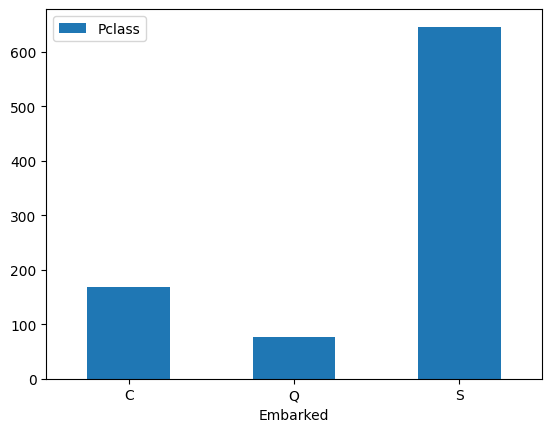

In [37]:
# 판다스를 이용한 시각화
# df.plot(x,y)

dataEmbarked.plot(kind='bar', x='Embarked', rot=0)

In [40]:
# 객실 등급별, 성별, 나이, 요금의 평균 계산

titanic.groupby(['Embarked','Sex'], as_index=False)[['Fare','Age']].mean().sort_values('Fare')

In [42]:
datasex = titanic.groupby(['Sex'], as_index=False)[['Fare','Age']].mean().sort_values('Fare')

In [43]:
datasex

,Sex,Fare,Age
1,male,25.523893,30.726645
0,female,44.479818,27.915709


<Axes: xlabel='Sex'>

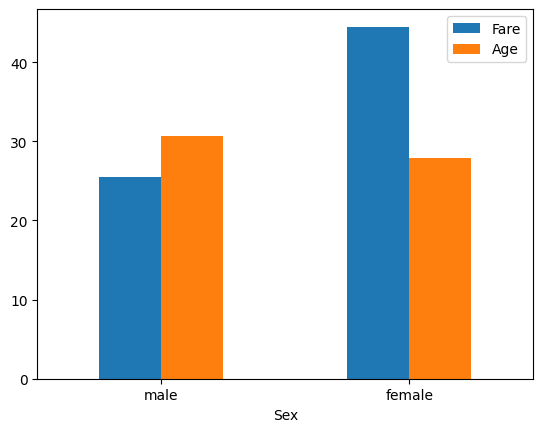

In [44]:
datasex.plot(kind='bar', x='Sex',rot=0)

### 객실 등급별 생존여부 현황 그래프 작성성

In [45]:
# 1단계 : 시각화 라이브러리 불러오기

import matplotlib.pyplot as plt

In [54]:
# 2단계 : 표시 할 데이터셋 정하기
# 0, 1

data0 = titanic.query('Survived==0').groupby('Pclass')[['Name']].count()
print(data0)
data1 = titanic.query('Survived==1').groupby('Pclass')[['Name']].count()
print(data1)

data = pd.merge(data0,data1,on='Pclass')
data.columns=['Death','Live']
data

        Name
Pclass      
1         80
2         97
3        372
        Name
Pclass      
1        136
2         87
3        119


,Death,Live
Pclass,,
1,80,136
2,97,87
3,372,119


<function matplotlib.pyplot.show(close=None, block=None)>

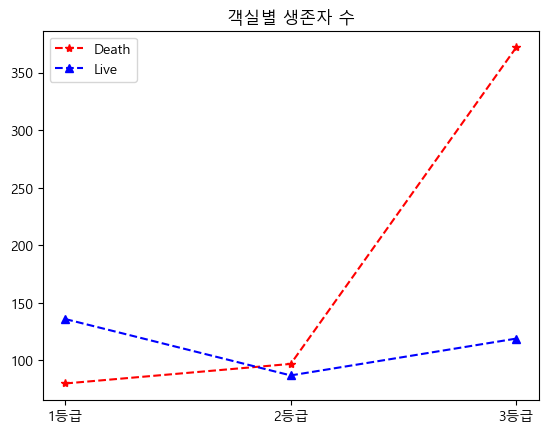

In [61]:
# 3단계 : plot()함수에 데이터 입력

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.plot(data.index, data['Death'], marker='*', linestyle='--',color='red', label='Death')
plt.plot(data.index, data['Live'], marker='^', linestyle='--',color='blue', label='Live')
plt.legend()
plt.xticks(data.index, ['1등급', '2등급', '3등급'])
plt.title('객실별 생존자 수')
plt.show

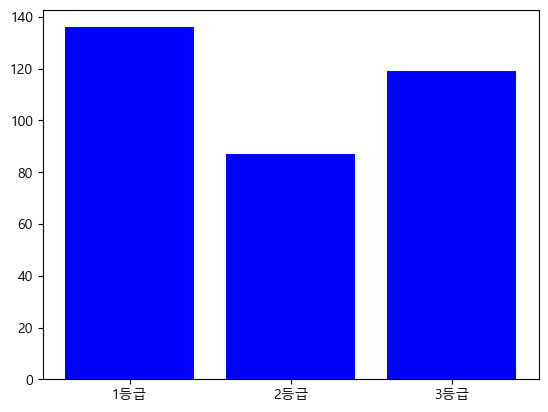

In [62]:
# 막대그래프 : 생존자 
plt.bar(data.index, data['Live'], color='blue',label ='Live')
plt.xticks(data.index, ['1등급', '2등급', '3등급'])
plt.show()